# Computer Vision 2: Object detection

* Object localization
* Landmark detection
* Bounding boxes
* Intersection over union
* Non-max suppression
* Anchor boxes
* The YOLO algorithm

In [ ]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Object detection theory

Object detection is a computer vision task that aims to identify and locate objects of interest within an image. Deep neural networks are extremely useful for object detection tasks due to their ability to learn complex patterns and hierarchical features from large amounts of data. Up until very recently, **convolutional neural networks (CNNs)** were the state of the art models for object detection applications. Recently however, the field of object detection has been taken over by **"transformers"**, a new kind of deep learning model. 

![Computer vision applications](/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_16/cold.jpeg)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.1 Object localization and bounding boxes

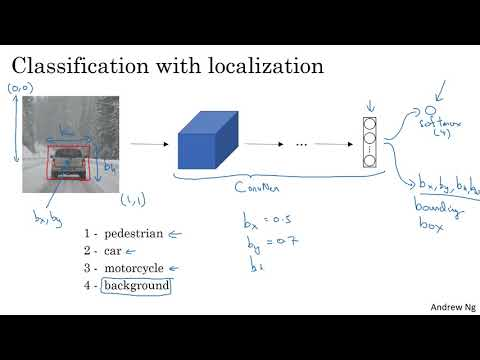

In [ ]:
YouTubeVideo("GSwYGkTfOKk", width=800, height=500)    

To perform object detection, we must be able to carry out **object localization**. Object localization focuses on locating a single object within an image, while object detection deals with identifying and locating multiple objects, possibly of different classes, within an image.

In both object localization and detection, the goal is not only to classify objects but also to locate them within the image. To achieve this, the neural network predicts a series of **bounding boxes** around potential objects. Bounding boxes are rectangular regions that enclose an object, defined by their coordinates (x, y, width, height ; where x and y are the central coordinates of the box) or (xmin, ymin, xmax, ymax ; where xmin, ymin are the bottom-left coordinates and xmax, max are the top-right coordinates) in the image.

Bounding Boxes serve as a way to represent the **location and extent** of an object. During training, the neural network learns to predict the coordinates of these boxes for each object of interest. Therefore, you can think of object localization and object detection as being a **combination of classification and regression**. The classification aspect deals with identifying which objects are present in the image whereas the regression aspect predicts the bounding box coordinates.

### 1.2 Landmark detection

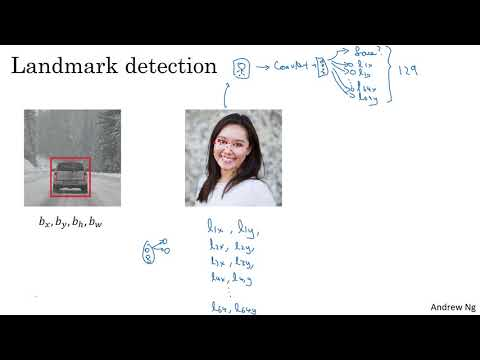

In [ ]:
YouTubeVideo("rRB9iymNy1w", width=800, height=500)    

Instead of, or in addition to predicting bounding boxes, another similar task in computer vision is landmark detection. **Landmark detection**, also known as **keypoint detection**, is a computer vision task that involves identifying and locating specific points of interest, or landmarks, on an object within an image. These landmarks often represent important or distinct features of the object, such as facial features on a human face (e.g., corners of the eyes, nose tip, mouth corners) or joints in a human body.

The main differences between landmark detection and object detection are the goals and the types of outputs produced:

* Goal: The goal of landmark detection is to identify and locate specific points on an object, while object detection aims to identify and locate instances of one or more object classes within an image. Landmark detection is more concerned with the object's structure or shape, whereas object detection focuses on identifying and localizing the object itself.

* Output: Landmark detection outputs a set of coordinates (x, y) representing the positions of the detected keypoints within the image. In contrast, object detection produces a set of bounding boxes enclosing the detected objects, along with their class labels and confidence scores.

Landmark detection is often used in tasks where understanding the object's structure or pose is important, such as facial recognition, emotion recognition, human pose estimation, or 3D reconstruction. In many cases, landmark detection can be combined with object detection to provide a richer understanding of the objects in an image. For example, in human pose estimation, object detection can be used to locate people within an image, and landmark detection can be applied to identify and locate keypoints representing their body joints.

### 1.3 The "sliding window" algorithm for object detection

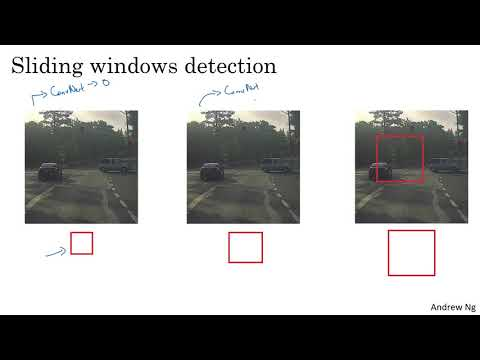

In [ ]:
YouTubeVideo("5e5pjeojznk", width=800, height=500)

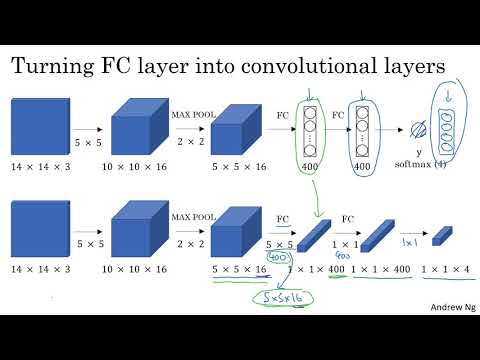

In [ ]:
YouTubeVideo("XdsmlBGOK-k", width=800, height=500)

### 1.4 Evaluating model predictions - the "Intersection over Union (IoU)" metric

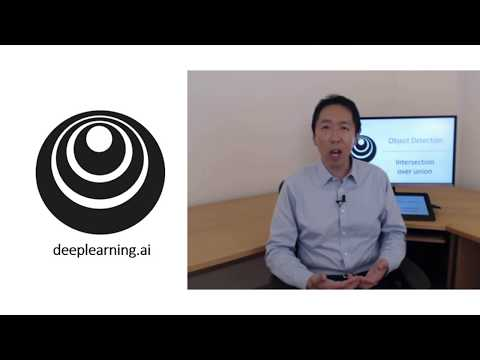

In [ ]:
YouTubeVideo("ANIzQ5G-XPE", width=800, height=500)

IoU is a metric used to evaluate the performance of object detection algorithms. It measures the overlap between two bounding boxes – the ground truth box (the actual box around the object as provided in the training data) and the predicted box. The IoU is the ratio of the area of intersection (where the two boxes overlap) to the area of their union (the combined area of both boxes). It ranges from 0 (no overlap) to 1 (perfect overlap). A higher IoU indicates better alignment between the predicted and ground truth bounding boxes.

### 1.5 Improving bounding box predictions - Nonmax suppression

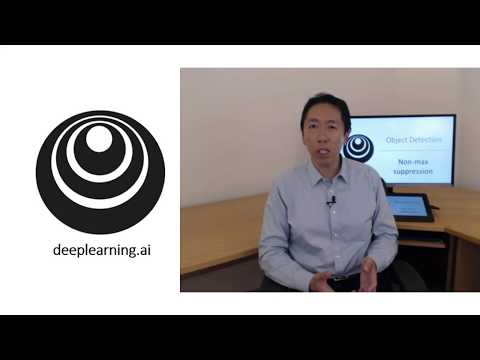

In [ ]:
YouTubeVideo("VAo84c1hQX8", width=800, height=500)

During object detection, a neural network may predict multiple bounding boxes for a single object. These overlapping boxes need to be filtered down to a single bounding box that best represents the object. Non-max suppression (NMS) is a technique used for this purpose. The algorithm works as follows:

1. For all predicted bounding boxes, sort them by their confidence scores (the likelihood that a box contains an object) in descending order.
2. Select the box with the highest confidence score as a "keeper" and remove it from the list of boxes.
3. Calculate the IoU between the keeper box and the remaining boxes. Remove any box with an IoU above a certain threshold (e.g., 0.5) from the list, as they likely represent the same object.
4. Repeat steps 2 and 3 until no boxes remain.

NMS helps to eliminate redundant bounding boxes and retain the most accurate prediction for each object.

### 1.6 Detecting multiple objects - anchor boxes

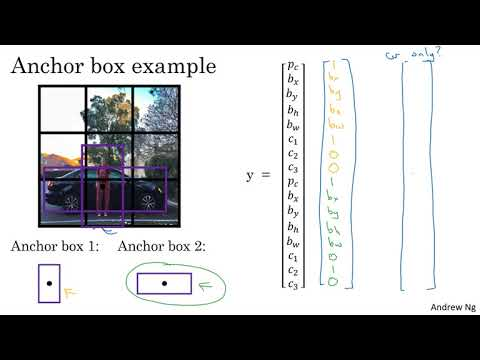

In [ ]:
YouTubeVideo("RTlwl2bv0Tg", width=800, height=500)

Anchor boxes, also known as anchor priors or default boxes, are pre-defined bounding box shapes used in object detection algorithms to improve the accuracy and efficiency of predicting object locations. They serve as starting points or reference boxes for the model to predict the actual bounding boxes of objects in an image.

Anchor boxes are introduced to tackle the problem of detecting objects with varying shapes, sizes, and aspect ratios. In the absence of anchor boxes, the model may struggle to learn the wide variety of bounding box shapes for different objects, especially when their aspect ratios differ significantly.

Here's how anchor boxes work in the context of object detection:

1. Multiple anchor boxes with different shapes and aspect ratios are defined, typically based on the characteristics of the objects in the training dataset.
2. During training, each ground truth bounding box (actual object location) is matched with the anchor box that has the highest overlap, measured by Intersection over Union (IoU).
3. The model learns to predict the difference between the ground truth bounding box and the matched anchor box in terms of their dimensions and coordinates, rather than predicting the absolute bounding box coordinates.
4. During inference, the model generates predictions as offsets to the anchor boxes. The predicted offsets are combined with the anchor boxes to produce the final bounding boxes for detected objects.

Anchor boxes are used in many popular object detection algorithms, such as Faster R-CNN, Single Shot MultiBox Detector (SSD), and RetinaNet. By leveraging anchor boxes, these algorithms can achieve better performance in detecting objects with varying sizes and aspect ratios.

### 1.7 Putting it all together - An introduction to the YOLO (You Only Look Once) algorithm

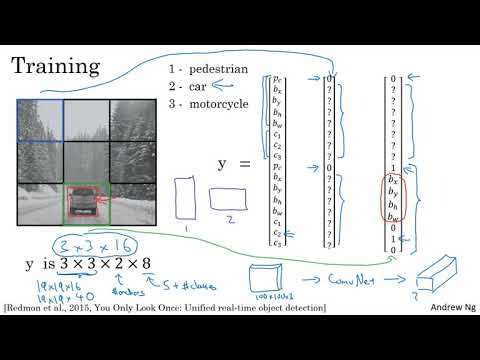

In [ ]:
YouTubeVideo("9s_FpMpdYW8", width=800, height=500)

**YOLO**, which stands for **"You Only Look Once"**, is a real-time object detection algorithm, which is designed to be fast and accurate while requiring fewer computational resources compared to other object detection methods, making it suitable for real-time applications.

The key idea behind the YOLO algorithm is to treat object detection as a single regression problem, rather than dividing it into multiple sub-tasks. YOLO divides an input image into an SxS grid and predicts the class probabilities and bounding box coordinates for each grid cell. Each grid cell is responsible for predicting a fixed number of bounding boxes, along with their confidence scores.

The main components of the YOLO algorithm are:

1. Network Architecture: YOLO uses a single convolutional neural network (CNN) architecture to perform both classification and bounding box regression. The network consists of several convolutional layers, followed by fully connected layers, which produce the final output tensor containing class probabilities, bounding box coordinates, and confidence scores.

2. Grid Division: The input image is divided into an SxS grid. Each grid cell is responsible for predicting the object's class and bounding box coordinates if the object's center falls within that cell.

3. Bounding Box Prediction: Each grid cell predicts a fixed number of bounding boxes (B) along with their confidence scores. The confidence score reflects the likelihood that the box contains an object and how well the predicted box fits the ground truth.

4. Class Prediction: Each grid cell predicts class probabilities for each of the C object classes.

5. Loss Function: YOLO uses a custom loss function that combines localization error (bounding box coordinate error), classification error (wrong object class), and confidence score error (incorrect confidence scores). This loss function helps the model learn to balance these different aspects of object detection.

6. Non-Maximum Suppression (NMS): After the predictions, YOLO applies non-maximum suppression to remove overlapping bounding boxes and retain the most accurate predictions.

YOLO has several advantages, including:

1. Speed: Due to its single-pass architecture, YOLO is significantly faster than other object detection algorithms, making it suitable for real-time applications.
2. End-to-End Learning: YOLO learns to predict bounding boxes and class probabilities simultaneously, which simplifies the training process and reduces potential errors caused by separate processing steps.
3. Context Awareness: YOLO processes the entire image at once, allowing it to capture global context and make better predictions.

However, YOLO has some limitations, such as:

1. Difficulty with small objects: The grid-based approach can make it challenging for YOLO to detect small objects or objects that are close together.
2. Fixed number of bounding boxes: Each grid cell can predict a fixed number of bounding boxes, which might not be suitable for scenes with varying object densities.

YOLO has evolved through several versions, with YOLOv7 being the latest (as of March 2023). Each version has introduced improvements in accuracy, speed, and overall performance.

## 2 Coding exercises

In this section, we will look at two coding examples where we will apply some of the theory from the previous sections.

1. Building and training an object localization regressor in TensorFlow.
2. Building and training a multi-class object detector and localizer in TensorFlow.

Some of the code will be provided to you, and in some places you will have to fill in the code yourself (with hints provided). If you are lost, you can check the solution notebook.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 2.1 Building an object localization regressor

When training an object localization model, as compared to an object classification model, there are two things to keep in mind. First, the dataset you are using must have **annotations**. That is, the coordinates of the bounding boxes in your training dataset must be available to you at training time. These coordinates will serve as your labels. Second, since this is a regression task, the loss function must be a **regression loss**, such as mean squared error.

### 2.2 Building a multi-class object detector and localizer

When you have multiple possible classes of object, your task now becomes a combination of classification and regression. Therefore, you need to build a model with both a **classification head** and a **regression head**. You can think of these two heads as two branches of your neural network, that will be independently trained using two separate loss functions. To implement this in TensorFlow, we can no longer use the sequential API, but rather will have to use the **functional API** to construct the network.